## Import library

In [2]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plotting library

## Reading CSV file into DataFrame

In [30]:
df_basics = pd.read_csv('title_basics_2018.csv')
df_ratings = pd.read_csv('title_ratings.csv')

## Exploratory Data Analysis (EDA)

#### First 5 readings

In [31]:
df_basics.head()

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
1,tt0111414,A Thin Life,A Thin Life,2018,75,Comedy
2,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60,Documentary
3,tt0192528,Heaven & Hell,Reverse Heaven,2018,104,Drama
4,tt0253093,Gangavataran,Gangavataran,2018,134,\N


In [32]:
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1543
1,tt0000002,6.1,186
2,tt0000003,6.5,1201
3,tt0000004,6.2,114
4,tt0000005,6.1,1921


#### Equal number of records and 'non-null count' indicates that there are no missing values for all columns for both DataFrames.

In [23]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12815 entries, 0 to 12814
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          12815 non-null  object
 1   primaryTitle    12815 non-null  object
 2   originalTitle   12815 non-null  object
 3   year            12815 non-null  int64 
 4   runtimeMinutes  12815 non-null  int64 
 5   genres          12815 non-null  object
dtypes: int64(2), object(4)
memory usage: 600.8+ KB


In [24]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985459 entries, 0 to 985458
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         985459 non-null  object 
 1   averageRating  985459 non-null  float64
 2   numVotes       985459 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ MB


#### This confirms that all records are from Year 2018.

In [25]:
df_basics.describe() 

,year,runtimeMinutes
count,12815.0,12815.000000
mean,2018.0,87.887163
std,0.0,33.998296
min,2018.0,1.000000
25%,2018.0,73.000000
50%,2018.0,89.000000
75%,2018.0,101.000000
max,2018.0,1320.000000


In [26]:
df_ratings.describe()

,averageRating,numVotes
count,985459.000000,9.854590e+05
mean,6.886208,9.577535e+02
std,1.401076,1.565533e+04
min,1.000000,5.000000e+00
25%,6.100000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.600000e+01
max,10.000000,2.151694e+06


## Analysis

### 1. According to the provided dataset, how many 2018 films were categorized as a Comedy?

#### Since the datasets are already filtered for 2018, we don't need to include that in the filtering.

In [43]:
df_basics = df_basics[['tconst', 'year', 'genres']]
comedy_2018 = df_basics[(df_basics['genres'].str.contains('Comedy', case=False, na=False))]
comedy_2018

,tconst,year,genres
1,tt0111414,2018,Comedy
11,tt0365545,2018,"Comedy,Drama,Romance"
13,tt0432010,2018,Comedy
14,tt0825334,2018,"Comedy,Drama"
16,tt0859635,2018,"Comedy,Crime,Mystery"
...,...,...,...
12800,tt9899840,2018,"Adventure,Comedy,Family"
12801,tt9899880,2018,"Comedy,Drama"
12803,tt9903952,2018,"Comedy,Horror"
12810,tt9908960,2018,Comedy


#### There are 2233 films categorized as Comedy in 2018.

In [28]:
count_comedy_2018 = len(comedy_2018)
print("Number of 2018 films categorized as Comedy:", count_comedy_2018)

Number of 2018 films categorized as Comedy: 2233


### 2. According to the provided dataset, how many 2018 films got a score of 8.0 or higher?

#### Join the two tables by using merge method. Display the matching film only.

In [33]:
merged_df = pd.merge(df_basics, df_ratings, on='tconst')
merged_df

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4937
1,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60,Documentary,7.5,6
2,tt0192528,Heaven & Hell,Reverse Heaven,2018,104,Drama,3.9,74
3,tt0253093,Gangavataran,Gangavataran,2018,134,\N,6.6,8
4,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40,Documentary,7.0,6
...,...,...,...,...,...,...,...,...
7224,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87,"Comedy,Horror",7.8,6
7225,tt9904014,Lost in Klessin,Lost in Klessin,2018,90,War,7.5,14
7226,tt9904530,Scream Returns,Scream Returns,2018,48,"Horror,Thriller",3.0,6
7227,tt9908960,Pliusas,Pliusas,2018,90,Comedy,4.1,18


#### There are 780 films with a score (average rating) of 8.0 or higher in 2018.

In [34]:
high_rated_films_2018 = merged_df[merged_df['averageRating'] >= 8.0]
number_of_high_rated_films = len(high_rated_films_2018)
print(f'Number of 2018 films with a score (average rating) of 8.0 or higher: {number_of_high_rated_films}')

Number of 2018 films with a score (average rating) of 8.0 or higher: 780


### 3. What was the best film of 2018?

#### Based on the datasets, a more accurate approach would be to filter both averageRating and numVotes.
#### However, since there is only one row of data when filtering for averageRating, it makes no difference if we were to filter for numVotes.
#### Therefore, the best film of 2018 is Exteriores: Mulheres Brasileiras na Diplomacia.

In [35]:
high_rating = merged_df[merged_df['averageRating'] == merged_df['averageRating'].max()]
high_rating

,tconst,primaryTitle,originalTitle,year,runtimeMinutes,genres,averageRating,numVotes
45,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52,Documentary,10.0,5


### 4. Do audiences prefer longer films, or shorter films?

#### Correlation between runtime and average rating.
#### A positive correlation suggests that longer films tend to receive higher ratings, while a negative correlation suggests the opposite.

In [36]:
correlation = merged_df['runtimeMinutes'].corr(merged_df['averageRating'])

correlation

0.03588627813406634

#### Scatter plot of runtime versus average rating.
#### The plot shows a slight trend of high rating for higher runtime films indicated by the heavy density on the top portion.

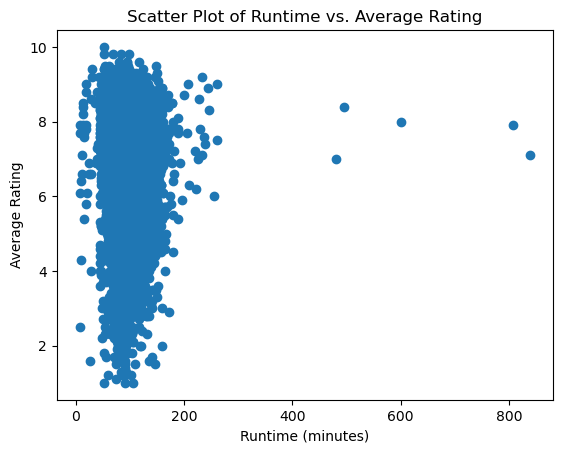

In [37]:
plt.scatter(merged_df['runtimeMinutes'], merged_df['averageRating'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Runtime vs. Average Rating')
plt.show()

#### The median runtime is calculated in order to identify the cutoff point which is 93 minutes.

In [38]:
# Calculate summary statistics for shorter and longer films
median_runtime = merged_df['runtimeMinutes'].median()
print(f'Median runtime: {median_runtime} minutes')

Median runtime: 93.0 minutes


#### This allows us to distinguish films belonging to the 'short' and 'long' category.

In [39]:
shorter_films = merged_df[merged_df['runtimeMinutes'] < median_runtime]
print(f'Count of shorter films: {len(shorter_films)}')
longer_films = merged_df[merged_df['runtimeMinutes'] >= median_runtime]
print(f'Count of shorter films: {len(longer_films)}')

Count of shorter films: 3545
Count of shorter films: 3684


#### The average rating for both categories is then calculated and compared. 
#### The analysis indicates that audiences prefer longer films.

In [41]:
avg_rating_shorter = shorter_films['averageRating'].mean()
avg_rating_longer = longer_films['averageRating'].mean()
print(f'Average Rating for Shorter Films: {avg_rating_shorter}')
print(f'Average Rating for Longer Films: {avg_rating_longer}')

Average Rating for Shorter Films: 6.17966149506348
Average Rating for Longer Films: 6.310260586319219
